3. Finally, we will realize a single rate version of the interpolator. This is shown in the figure below. This is also the SFG to be used for subsequent laboratory works. 

a) Create the SFG. Identify adaptor coefficients by comparing with Task 2. 

Go with the quantized for now...

In [15]:
from b_asic.core_operations import Addition, ConstantMultiplication, SymmetricTwoportAdaptor
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output
from b_asic.sfg_generators import wdf_allpass

# old assignments
a1 = -0.068129
a3 = -0.242429
a5 = -0.461024
a7 = -0.678715
a9 = -0.888980

a10 = 0.4573
a11 = -0.2098
a12 = 0.5695
a13 = -0.2123
a14 = 0.0952
a15 = -0.2258
a16 = -0.4490

na1  = a10
na2  = a11
na3  = a12
na4  = a13
na5  = a14
na6  = a15
na7  = a16

na8  = a1
na9  = a5
na10 = a9
na11 = a3
na12 = a7

# na11 = na16 & na21
# na12 = na17 & na22 
# na8  = na13 & na18
# na9  = na14 & na19
# na10 = na15 & na20 
na16 = na11
na21 = na11

na17 = na12
na22 = na12

na13 = na8
na18 = na8

na14 = na9
na19 = na9

na15 = na10
na20 = na10

Wf = 11

na1_q  = round(na1 * 2**Wf) * 2**(-Wf)
na3_q  = round(na3 * 2**Wf) * 2**(-Wf)
na5_q  = round(na5 * 2**Wf) * 2**(-Wf)
na7_q  = round(na7 * 2**Wf) * 2**(-Wf)
na9_q  = round(na9 * 2**Wf) * 2**(-Wf)

na10_q = round(na10 * 2**Wf) * 2**(-Wf)
na11_q = round(na11 * 2**Wf) * 2**(-Wf)
na12_q = round(na12 * 2**Wf) * 2**(-Wf)
na13_q = round(na13 * 2**Wf) * 2**(-Wf)
na14_q = round(na14 * 2**Wf) * 2**(-Wf)
na15_q = round(na15 * 2**Wf) * 2**(-Wf)
na16_q = round(na16 * 2**Wf) * 2**(-Wf)

na17_q = round(na17 * 2**Wf) * 2**(-Wf)
na18_q = round(na18 * 2**Wf) * 2**(-Wf)
na19_q = round(na19 * 2**Wf) * 2**(-Wf)
na20_q = round(na20 * 2**Wf) * 2**(-Wf)
na21_q = round(na21 * 2**Wf) * 2**(-Wf)
na22_q = round(na22 * 2**Wf) * 2**(-Wf)

In [16]:
#####################################
# Inputs/Outputs
#####################################
x = Input()
y0 = Output()
y1 = Output()
y2 = Output()
y3 = Output()

#####################################
# Upper filter (H_AP)
#####################################

# Create WDFs
wdf_1 = wdf_allpass([na1])
wdf_2 = wdf_allpass([na2, na3])
wdf_4 = wdf_allpass([na4, na5])
wdf_6 = wdf_allpass([na6, na7])

# Connect the WDFs
wdf_1 <<= x
wdf_2 <<= wdf_1
wdf_4 <<= wdf_2
wdf_6 <<= wdf_4

#####################################
# First bottom filter (8-12)
#####################################

# Create WDFs
wdf_8  = wdf_allpass([na8])
wdf_9  = wdf_allpass([na9])
wdf_10 = wdf_allpass([na10])
wdf_11 = wdf_allpass([na11])
wdf_12 = wdf_allpass([na12])

# Connect the WDFs
wdf_8 <<= wdf_6
wdf_9 <<= wdf_8
wdf_10 <<= wdf_9

wdf_11 <<= wdf_6
wdf_12 <<= wdf_11

#####################################
# Middle bottom filter (16,17,21,22)
#####################################

## Connect 16,17,21,22 to eachother

# Create STAs and delays
T0 = Delay()
T1 = Delay()
sta_21 = SymmetricTwoportAdaptor(na21)
sta_16 = SymmetricTwoportAdaptor(na16)
sta_22 = SymmetricTwoportAdaptor(na22)
sta_17 = SymmetricTwoportAdaptor(na17)

# Connect delays
T0 <<= sta_21.output(1)
sta_17.input(1).connect(T1)

T1 <<= sta_22.output(1)
sta_16.input(1).connect(T0)

# Interconnect the upper/lower STAs
sta_21.input(1).connect(sta_16.output(1))
sta_22.input(1).connect(sta_17.output(1))

# Connect STAs horizontally
sta_22.input(0).connect(sta_21.output(0))
sta_17.input(0).connect(sta_16.output(0))

## Connect to other parts
sta_16.input(0).connect(wdf_10)
sta_21.input(0).connect(wdf_12)

#####################################
# Last filter (13,14,15,18,19,20)
#####################################

## Connect 13,14,15,18,19,20 to eachother

# Create STAs and delays
T2 = Delay()
T3 = Delay()
T4 = Delay()
sta_13 = SymmetricTwoportAdaptor(na13)
sta_14 = SymmetricTwoportAdaptor(na14)
sta_15 = SymmetricTwoportAdaptor(na15)
sta_18 = SymmetricTwoportAdaptor(na18)
sta_19 = SymmetricTwoportAdaptor(na19)
sta_20 = SymmetricTwoportAdaptor(na20)

# Connect delays
T2 <<= sta_18.output(1)
sta_13.input(1).connect(T2)

T3 <<= sta_19.output(1)
sta_14.input(1).connect(T3)

T4 <<= sta_20.output(1)
sta_15.input(1).connect(T4)

# Interconnect the upper/lower STAs
sta_18.input(1).connect(sta_13.output(1))
sta_19.input(1).connect(sta_14.output(1))
sta_20.input(1).connect(sta_15.output(1))

# Connect STAs horizontally
sta_19.input(0).connect(sta_18.output(0))
sta_20.input(0).connect(sta_19.output(0))

sta_14.input(0).connect(sta_13.output(0))
sta_15.input(0).connect(sta_14.output(0))

## Connect to other parts
sta_18.input(0).connect(wdf_12)
sta_13.input(0).connect(wdf_10)

#####################################
# Outputs
#####################################
y0 <<= sta_15.output(0)
y1 <<= sta_17.output(0)
y2 <<= sta_20.output(0)
y3 <<= sta_22.output(0)

#####################################
# Naming
#####################################
wdf_1.graph_id  = "1"
wdf_2.graph_id  = "2"
wdf_4.graph_id  = "4"
wdf_6.graph_id  = "6"
wdf_8.graph_id  = "8"
wdf_9.graph_id  = "9"
wdf_10.graph_id = "10"
wdf_11.graph_id = "11"
wdf_12.graph_id = "12"

sta_13.graph_id = "13"
sta_14.graph_id = "14"
sta_15.graph_id = "15"
sta_18.graph_id = "18"
sta_19.graph_id = "19"
sta_20.graph_id = "20"

sta_17.graph_id = "17"
sta_16.graph_id = "16"
sta_22.graph_id = "22"
sta_21.graph_id = "21"

wdf_1.connect_external_signals_to_components()
wdf_2.connect_external_signals_to_components()
wdf_4.connect_external_signals_to_components()
wdf_6.connect_external_signals_to_components()
wdf_8.connect_external_signals_to_components()
wdf_9.connect_external_signals_to_components()
wdf_10.connect_external_signals_to_components()
wdf_11.connect_external_signals_to_components()
wdf_12.connect_external_signals_to_components()

#####################################
# Build
#####################################
sfg = SFG([x], [y0, y1, y2, y3])
sfg

ValueError: Output signal #0 is missing source in SFG

In [ ]:
## Test for 16,17,21,22
#x0 = Input()
#y0 = Output()
#
## Create STAs and delays
#T0 = Delay()
#T1 = Delay()
#sta_21 = SymmetricTwoportAdaptor(a21)
#sta_16 = SymmetricTwoportAdaptor(a16)
#sta_22 = SymmetricTwoportAdaptor(a22)
#sta_17 = SymmetricTwoportAdaptor(a17)
#
#sta_16.input(0).connect(x0)
#sta_21.input(0).connect(x0)
#
## Connect delays
#T0 <<= sta_21.output(1)
#sta_17.input(1).connect(T1)
#
#T1 <<= sta_22.output(1)
#sta_16.input(1).connect(T0)
#
## Interconnect the upper/lower STAs
#sta_21.input(1).connect(sta_16.output(1))
#sta_22.input(1).connect(sta_17.output(1))
#
## Connect STAs horizontally
#sta_22.input(0).connect(sta_21.output(0))
#sta_17.input(0).connect(sta_16.output(0))
#
## Output
#y0 <<= sta_22.output(0) + sta_17.output(0)
#
## Naming
#sta_21.graph_id = "21"
#sta_16.graph_id = "16"
#sta_22.graph_id = "22"
#sta_17.graph_id = "17"
#
#sfg = SFG([x0], [y0])
#sfg

In [ ]:

## Test for 13,14,15,18,19,20
#x0 = Input()
#y0 = Output()
#
## Create STAs and delays
#T2 = Delay()
#T3 = Delay()
#T4 = Delay()
#sta_13 = SymmetricTwoportAdaptor(a13)
#sta_14 = SymmetricTwoportAdaptor(a14)
#sta_15 = SymmetricTwoportAdaptor(a15)
#sta_18 = SymmetricTwoportAdaptor(a18)
#sta_19 = SymmetricTwoportAdaptor(a19)
#sta_20 = SymmetricTwoportAdaptor(a20)
#
#sta_18.input(0).connect(x0)
#sta_13.input(0).connect(x0)
#
## Connect delays
#T2 <<= sta_18.output(1)
#sta_13.input(1).connect(T2)
#
#T3 <<= sta_19.output(1)
#sta_14.input(1).connect(T3)
#
#T4 <<= sta_20.output(1)
#sta_15.input(1).connect(T4)
#
## Interconnect the upper/lower STAs
#sta_18.input(1).connect(sta_13.output(1))
#sta_19.input(1).connect(sta_14.output(1))
#sta_20.input(1).connect(sta_15.output(1))
#
## Connect STAs horizontally
#sta_19.input(0).connect(sta_18.output(0))
#sta_20.input(0).connect(sta_19.output(0))
#
#sta_14.input(0).connect(sta_13.output(0))
#sta_15.input(0).connect(sta_14.output(0))
#
## Output
#y0 <<= sta_15.output(0) + sta_20.output(0)
#
## Naming
#sta_13.graph_id = "13"
#sta_14.graph_id = "14"
#sta_15.graph_id = "15"
#sta_18.graph_id = "18"
#sta_19.graph_id = "19"
#sta_20.graph_id = "20"
#
#sfg = SFG([x0], [y0])
#sfg

b) Simulate the impulse response and using your reference signal to validate that the filter has the same function as the first design iteration. Save the output from the impulse response simulation, to be used in the final question. 

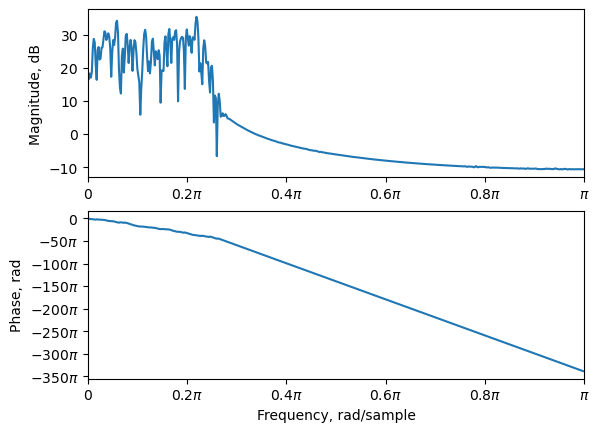

In [ ]:
from b_asic.simulation import Simulation
import numpy as np
import matplotlib.pyplot as plt
from b_asic.signal_generator import Impulse
from mplsignal.freq_plots import freqz_fir
from b_asic.utils import interleave 

import pickle
with open("data.txt", "rb") as f:
    data = pickle.load(f)

sim = Simulation(sfg, [data])
sim.run_for(100)

y = interleave(sim.results["0"], sim.results["1"], sim.results["2"], sim.results["3"])
f = freqz_fir(y)

c) Determine the number of adaptor operations required per second. 

Answer: 

In [ ]:
fs = 1.6e6
print(fs*(7+5+4+6)/1e6, "M op/s")

35.2 M op/s


d) Plot the precedence graph of the filter. How many two-port operations are in the critical path? 

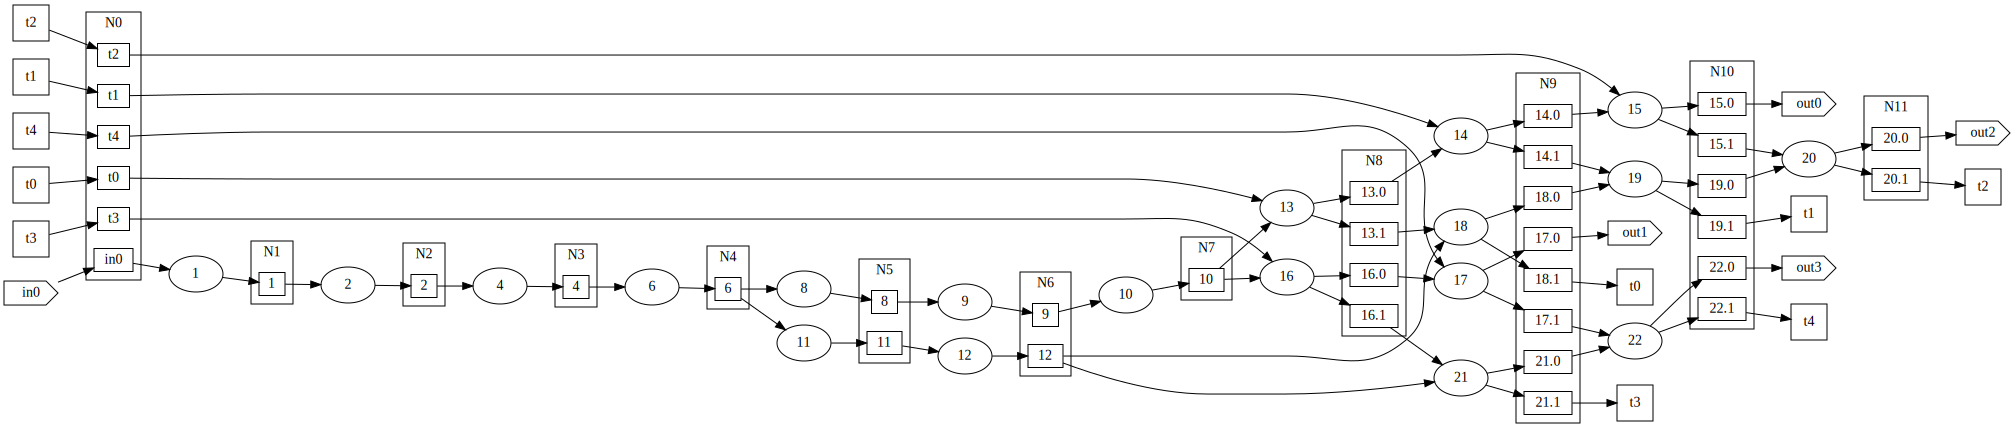

In [ ]:
sfg.precedence_graph

Answer:

11

e) Introduce pipelining such that the critical path is at most three adaptors. Mark in the figure where delays are introduced. Check by plotting the precedence graph. 

f) Simulate the impulse response for the pipelined filter. Compare the phase response with the non-pipelined design by plotting both in the same figure. Comments? 

Comments: